In [1]:
# load libarary

"""
===============================
This is a LogisticRegression model:
Step1: PCA reduce the dimension into 2-D (x_1,x_2)
Step2: Feature mapping (1,x_1,x_2,x_1^2,x_1*x_2,x_2^2,x_1^3,x_2^3, ...),28 features polynomial function(6次幂)
Step3: Build LogisticRegression Model
===============================

"""
print(__doc__)


%matplotlib inline
import os.path
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(style="whitegrid",color_codes=True)


This is a LogisticRegression model:
Step1: PCA reduce the dimension into 2-D (x_1,x_2)
Step2: Feature mapping (1,x_1,x_2,x_1^2,x_1*x_2,x_2^2,x_1^3,x_2^3, ...),28 features polynomial function(6次幂)
Step3: Build LogisticRegression Model




In [2]:
# load data
def load_data(path,label):
    os.chdir(path)
    files = os.listdir(path)
    n = len(files)
    com1 = np.zeros([1, 8100])
    for i in range(0, n):
        Data_dict = loadmat(files[i])
        Data_116 = Data_dict['con_mat_FA']
        Data_90 = Data_116[0:90, 0:90]  # 90*90 FA矩阵
        Data_1 = np.reshape(Data_90, (1, 8100))
        com1 = np.row_stack((com1, Data_1))
    # Train set data
    Data = com1[1:n+1, 0:8100]
    # 标签y
    y = np.array(label).transpose()
    return Data, y

In [3]:
path = 'E:\\Experiment2\\train'
label = [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
         1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
         1, 0, 0, 0]
X,y=load_data(path,label)
# label

In [4]:
X=pd.DataFrame(X)

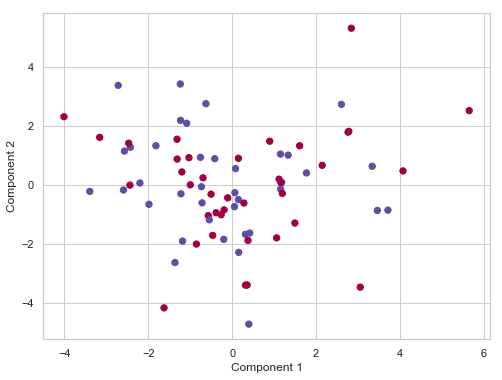

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def scatter_PCA(X,label):
    fig, ax = plt.subplots(figsize=(8,6))
    pca=PCA(n_components=2)
    reduced_x=pca.fit_transform(X)
    ax.scatter(reduced_x[:,0],reduced_x[:,1],s=40, c=label,cmap=plt.cm.Spectral)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    return reduced_x

X_PCA=scatter_PCA(X,y)

In [6]:
X_PCA

array([[ 3.70880257e+00, -8.52378984e-01],
       [-7.18067656e-01, -6.07317803e-01],
       [-2.42571091e+00,  1.27219529e+00],
       [-1.62391724e+00, -4.15615253e+00],
       [ 1.46448172e-01,  8.99248642e-01],
       [-1.02999021e+00,  9.20262313e-01],
       [ 1.55291645e-01, -2.27959696e+00],
       [-2.62255679e-01, -1.00796318e+00],
       [ 3.55693494e-01, -3.38279745e+00],
       [-5.70314635e-01, -1.03670450e+00],
       [ 8.93467460e-01,  1.47702455e+00],
       [ 3.16210483e-01, -3.38787301e+00],
       [ 4.06834539e+00,  4.72755539e-01],
       [ 7.95789360e-02,  5.51573814e-01],
       [ 1.17735944e+00,  8.66195950e-02],
       [ 2.14324703e+00,  6.63146129e-01],
       [ 3.05024182e+00, -3.45561309e+00],
       [-2.19863479e+00,  6.50772134e-02],
       [ 3.14475548e-01, -1.66712712e+00],
       [-1.08431255e+00,  2.08357644e+00],
       [ 1.47912296e-01, -4.96236154e-01],
       [ 1.49340257e+00, -1.28824494e+00],
       [ 5.46323669e-02, -7.34632888e-01],
       [ 1.

In [7]:
x1 = np.array(X_PCA[:,0])
x2 = np.array(X_PCA[:,1])

In [8]:
def feature_mapping(x, y, power, as_ndarray=False):

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)

In [9]:
d = feature_mapping(x1, x2, power=6)
print(d.shape)
d.head()

(76, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,3.708803,-0.852379,13.755216,-3.161305,0.726550,51.015382,-11.724657,2.694630,-0.619296,...,-8.518549,1.957783,-0.449949,2602.569220,-598.137881,137.467592,-31.593617,7.261032,-1.668773,0.383527
1,1.0,-0.718068,-0.607318,0.515621,0.436095,0.368835,-0.370251,-0.313146,-0.264848,-0.224000,...,-0.115499,-0.097685,-0.082619,0.137086,0.115943,0.098060,0.082936,0.070145,0.059326,0.050176
2,1.0,-2.425711,1.272195,5.884073,-3.085978,1.618481,-14.273061,7.485691,-3.925967,2.059024,...,12.115447,-6.354102,3.332491,203.720272,-106.843718,56.035562,-29.388572,15.413214,-8.083659,4.239579
3,1.0,-1.623917,-4.156153,2.637107,6.749248,17.273604,-4.282444,-10.960220,-28.050903,-71.791732,...,-189.322495,-484.540188,-1240.101943,18.339325,46.936526,120.126418,307.444064,786.853166,2013.822927,5154.052827
4,1.0,0.146448,0.899249,0.021447,0.131693,0.808648,0.003141,0.019286,0.118425,0.727176,...,0.015596,0.095764,0.588029,0.000010,0.000061,0.000372,0.002284,0.014024,0.086116,0.528785


In [10]:
# set X and y (remember from above that we moved the label to column 0)
cols = d.shape[1]
X2 = d.iloc[:,0:cols]
y2 = pd.Series(y)

In [11]:
# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(d.shape[1])
X2.shape

(76, 28)

In [16]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, y2.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
model.score(X2, y2)

0.7236842105263158

In [19]:
# 原始数据不做处理
model_origin = linear_model.LogisticRegression(penalty='l2', C=1.0)
model_origin.fit(X, y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
model_origin.score(X, y)

1.0

In [21]:
X

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,0.399103,0.000000,0.396389,0.000000,0.000000,0.000000,0.425646,0.000000,0.408987,0.000000,...,0.0,0.405797,0.000000,0.448407,0.0,0.350161,0.000000,0.279976,0.567644,0.303349
1,0.399486,0.000000,0.360243,0.470173,0.406862,0.000000,0.355547,0.000000,0.391806,0.000000,...,0.0,0.334595,0.000000,0.344352,0.0,0.322526,0.000000,0.215589,0.550202,0.252448
2,0.421582,0.000000,0.433237,0.000000,0.403669,0.000000,0.410348,0.000000,0.000000,0.000000,...,0.0,0.411889,0.000000,0.451130,0.0,0.336344,0.000000,0.322856,0.447141,0.336177
3,0.369895,0.000000,0.390261,0.000000,0.420406,0.000000,0.373096,0.000000,0.000000,0.000000,...,0.0,0.411902,0.000000,0.285390,0.0,0.334266,0.000000,0.324291,0.000000,0.313617
4,0.370738,0.506075,0.450417,0.516779,0.429471,0.000000,0.389569,0.000000,0.000000,0.000000,...,0.0,0.451003,0.000000,0.469318,0.0,0.334859,0.000000,0.390313,0.000000,0.261991
5,0.365224,0.000000,0.418889,0.000000,0.449734,0.000000,0.412672,0.000000,0.000000,0.000000,...,0.0,0.389918,0.000000,0.407583,0.0,0.328002,0.000000,0.389280,0.000000,0.291723
6,0.391916,0.000000,0.439818,0.000000,0.475140,0.000000,0.420358,0.499800,0.345593,0.000000,...,0.0,0.411753,0.000000,0.444284,0.0,0.316237,0.000000,0.319695,0.000000,0.304106
7,0.376765,0.000000,0.409664,0.000000,0.406996,0.000000,0.415511,0.000000,0.000000,0.000000,...,0.0,0.415745,0.000000,0.390007,0.0,0.356468,0.000000,0.308246,0.547493,0.322122
8,0.406625,0.000000,0.393698,0.000000,0.418077,0.000000,0.379949,0.000000,0.355542,0.000000,...,0.0,0.435021,0.000000,0.384946,0.0,0.375488,0.000000,0.347863,0.000000,0.310839
9,0.384395,0.000000,0.417044,0.000000,0.443436,0.000000,0.373198,0.000000,0.424393,0.000000,...,0.0,0.385298,0.000000,0.369399,0.0,0.377537,0.000000,0.325611,0.555838,0.291087
